### Choosing pickle files
- Using tensorboard determine the (1) test domain (2) best set of hparams
### PACS Dataset Information
- 66 $\rightarrow C_N=\{1,6\}, C_O=\{0,2,3,4,5\}$
- 33 $\rightarrow C_N=\{0,1,3,5,6\}, C_O=\{2,4\}$
### VLCS Dataset Information
- 66 $\rightarrow C_N=\{1\}, C_O=\{0,2,3,4\}$
- 33 $\rightarrow C_N=\{0,1,4\}, C_O=\{2,3\}$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib as mpl
import matplotlib.cm as cm
import os
import numpy as np
from glob import glob
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from tqdm import tqdm
import tsne as utils

%load_ext autoreload
%autoreload 2
dir(mcolors)
#mcolors.LightSource
list(mcolors.TABLEAU_COLORS.keys())

FILE_SAVE = '/Users/noname/scratch/saved/domainbed_results'
#mcolors.Pastel2.keys()
#dir(plt.get_cmap('hot'))


#dir(cm.Pastel2)
#cm.Pastel2

# VLCS 66% Dataset
(nacc, nacc) Baseline: ERM, CAD

(nacc, macc) Baseline: MLDG

In [ ]:
vlcs_nacc_erm = [
    "ERM_VLCS_o66_h5_s5001_t3_230312013641/595dcaf3704c7f7822b482a5b0ee52bb",
    "ERM_VLCS_o66_h5_s5001_t3_230312013641/008f639143fbff022eaa204a6a08ff28",
    "ERM_VLCS_o66_h5_s5001_t3_230312013641/789feb607fa82da49ef377ff8c3349fc",
    "ERM_VLCS_o66_h5_s5001_t3_230312013641/c9ff92bd072ec6bce943491f7cbae113",
    "ERM_VLCS_o66_h5_s5001_t3_230312013641/91cb04ee6751580711f20b0a1d193b50",
    "ERM_VLCS_o66_h5_s5001_t3_230312013641/24733e5f95c047684aa0190c3bd0af1a",
    "ERM_VLCS_o66_h5_s5001_t3_230312013641/ed3ff427dd7e96f36d5a6fcf46ab9ecb",
    "ERM_VLCS_o66_h5_s5001_t3_230312013641/ed40bcd08ec8da386a719f121633721a",
    "ERM_VLCS_o66_h5_s5001_t3_230312013641/84aacca002ce38c3f6d12916f11ad654",
    "ERM_VLCS_o66_h5_s5001_t3_230312013641/6eca09bb0bb7356c04e9b795bf8b163d",
    "ERM_VLCS_o66_h5_s5001_t3_230312013641/b9c3d59c10a71ed2e559633856ccf6e2",
    "ERM_VLCS_o66_h5_s5001_t3_230312013641/4a197abd26e86f6f0e9ccdc31ec251dd",
]
files = utils.get_pickle_files(vlcs_nacc_erm)
vlcs_nacc_erm = utils.get_tsne_df_list(files)

In [ ]:
utils.plot_embeddings(vlcs_nacc_erm)

In [ ]:
vlcs_nacc_cad = [
    "CAD_VLCS_o66_h5_s5001_t3_35775901/d13e797f87c091b33ed0f76d3b69aa25",
    "CAD_VLCS_o66_h5_s5001_t3_35775901/89df98a9eec6bb1e017edbf85252858f",
    "CAD_VLCS_o66_h5_s5001_t3_35775901/e275e51376c59d182cb9f7de4e134bea",
    "CAD_VLCS_o66_h5_s5001_t3_35775901/cb0d7d5bd5f928cced5f9204ca7b7a26",
    "CAD_VLCS_o66_h5_s5001_t3_35775901/32ab270c316cc81af7dbc95284fba546",
    "CAD_VLCS_o66_h5_s5001_t3_35775901/4a93634e23cf914521e0bce7f71a4172",
    "CAD_VLCS_o66_h5_s5001_t3_35775901/35b174618653b61f9cb9c8e6ff962847",
    "CAD_VLCS_o66_h5_s5001_t3_35775901/bab924fd9b14ad7bbb099dff5c7ef101",
    "CAD_VLCS_o66_h5_s5001_t3_35775901/7efc06aaf5b40b4e0b750f378960f7b0",
    "CAD_VLCS_o66_h5_s5001_t3_35775901/e2e68e4bcc96b311d08a049a5d6fe312",
    "CAD_VLCS_o66_h5_s5001_t3_35775901/35f541d31711a770fe5867cb4334360c",
    "CAD_VLCS_o66_h5_s5001_t3_35775901/0acc0a949a626ddcb4ced088c92a504f",
]
files = utils.get_pickle_files(vlcs_nacc_cad)
vlcs_nacc_cad = utils.get_tsne_df_list(files)

In [ ]:
utils.plot_embeddings(vlcs_nacc_cad)

In [ ]:
vlcs_nacc_poxl = [
"XDomBetaError_VLCS_o66_h5_s5001_t3_2023-04-11-VLCS/a939615211c8c12c2c44867a874aca0f",
"XDomBetaError_VLCS_o66_h5_s5001_t3_2023-04-11-VLCS/b821a3eb735840394c5679b960a4bf2f",
"XDomBetaError_VLCS_o66_h5_s5001_t3_2023-04-11-VLCS/64dac8d2aae01d169ad240c45db63060",
"XDomBetaError_VLCS_o66_h5_s5001_t3_2023-04-11-VLCS/030e8a284927affcae7680e1f57aaa78",
"XDomBetaError_VLCS_o66_h5_s5001_t3_2023-04-11-VLCS/dd9393584fa4162e174f23f5b58d9976",
"XDomBetaError_VLCS_o66_h5_s5001_t3_2023-04-11-VLCS/270c3a3ef1a963ac638c3c09f686b062",
"XDomBetaError_VLCS_o66_h5_s5001_t3_2023-04-11-VLCS/42845ff41520780446cc4252c993ca79",
"XDomBetaError_VLCS_o66_h5_s5001_t3_2023-04-11-VLCS/cf488527319423adaa5f3bdd07963e9d",
"XDomBetaError_VLCS_o66_h5_s5001_t3_2023-04-11-VLCS/a468d675228b701eb62155754670f46a",
"XDomBetaError_VLCS_o66_h5_s5001_t3_2023-04-11-VLCS/a979472c03b9129be16cb9df7049370a",
"XDomBetaError_VLCS_o66_h5_s5001_t3_2023-04-11-VLCS/eac63d011625eb5a8e12c5e184ef4917",
"XDomBetaError_VLCS_o66_h5_s5001_t3_2023-04-11-VLCS/c4d94358aee7d22fa8981f45d0a81a2d",
]
files = utils.get_pickle_files(vlcs_nacc_poxl)
vlcs_nacc_poxl = utils.get_tsne_df_list(files)

In [ ]:
utils.plot_embeddings(vlcs_nacc_poxl)

# PACS 66% Dataset
(nacc, nacc) Baseline: ARM

(nacc, macc) Baseline: CORAL

In [14]:
pacs_nacc_erm = [
    "ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/146027d012c1e0b0322b2ae3fe672b74",
    "ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/d276cb54cdb52181348333a0a92c27f6",
    "ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/07359767d3beb0751d048ebef8742cea",
    "ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/b4a403603cfae2b79c14a8a578e68c96",
    "ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/b944c0f799ccbad794fb20674c7ed088",
    "ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/8858446df972524627c982b5b3a255ad",
    "ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/f37a062167e38bf3fc58fb1c98eee139",
    "ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/8d1cf09570355de7fd1c84226b3b094c",
    "ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/e0b01fd0d32e965050d616cd637b2965",
    "ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/7bb3fbbd8178fb5978fd5f7d08367066",
    "ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/e0e0f3dd065da05688c758b826692a18",
    "ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/5b6c62f756e21a7af8c6863b3755d7e9",
]
files = utils.get_pickle_files(pacs_nacc_erm[5])
pacs_nacc_erm = utils.get_tsne_df_list(files)

  0%|                                                                                                          | 0/1 [00:00<?, ?it/s]

Cumulative explained variation for 48 principal components: 0.9145358800888062


/Users/noname/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/noname/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:17<00:00, 17.69s/it]


Number of plots:  1


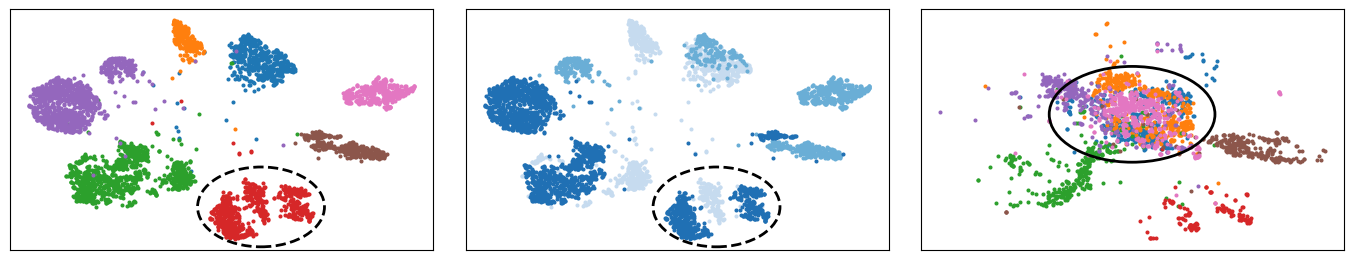

In [150]:
fig, axes = utils.plot_embeddings(pacs_nacc_erm)

# draw area of interest
circle = plt.Circle((22, -48), 25, fill=False, linewidth=2, linestyle='--')
axes[1].add_artist(circle)
circle = plt.Circle((22, -48), 25, fill=False, linewidth=2, linestyle='--')
axes[0].add_artist(circle)

circle = plt.Circle((0, 10), 30, fill=False, linewidth=2)
axes[2].add_artist(circle)
# circle = plt.Circle((-32, -30), 30, fill=False, linewidth=2)
# axes[0].add_artist(circle)

for ax, name in zip(axes, ['source', 'domain', 'target']):
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])

    ax.tick_params(axis='both', which='both', bottom=False, top=False, 
                   left=False, right=False, labelbottom=False)
    
    # save each subplot
    extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(os.path.join(FILE_SAVE, f'tsne_pacs_erm_{name}.pdf'),
               bbox_inches=extent.expanded(1.1,1.1))
    
fig.savefig(os.path.join(FILE_SAVE, 'tsne_pacs_erm.pdf'), bbox_inches='tight', format='pdf')

In [16]:
pacs_nacc_poxl = [
"XDomBetaError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/089ef9d796b4e1c64270097c528f728a",
"XDomBetaError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/cc2322dfe208796bc8f76462e7635d7c",
"XDomBetaError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/4f1ce02e9fa39b219a486c639eeb3672",
"XDomBetaError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/43eba20c25f879c0ebebf0bd83256bc7",
"XDomBetaError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/55bb0f9272389164afa95c26c96d5cea",
"XDomBetaError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/9fd7b1522421b013769b99051cd95943",
"XDomBetaError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/32adc55bed61b337e019e66ed4da0962",
"XDomBetaError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/868f20c773a89ed45bb6ee66530375f0",
"XDomBetaError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/a0bb2694175bc3b66522e9e2b9e45658",
"XDomBetaError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/cc39d4a860e995a72b5235ecf6d9cf05",
"XDomBetaError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/32cc32ea1d092c1873a039791c79f036",
"XDomBetaError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/75eb3ee391097d34d99d24356243b7f1",
]
files = utils.get_pickle_files(pacs_nacc_poxl[4])
pacs_nacc_poxl = utils.get_tsne_df_list(files)

  0%|                                                                                                          | 0/1 [00:00<?, ?it/s]

Cumulative explained variation for 48 principal components: 0.9990530014038086


/Users/noname/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/noname/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:17<00:00, 17.71s/it]


Number of plots:  1


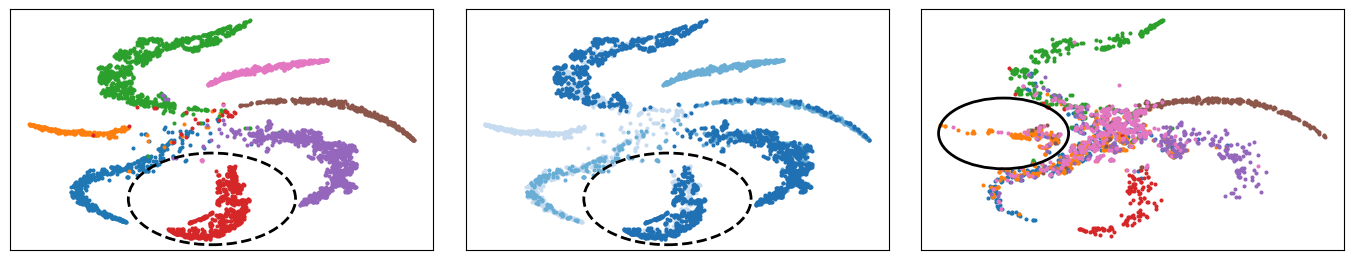

In [151]:
fig, axes = utils.plot_embeddings(pacs_nacc_poxl)

circle = plt.Circle((-50, -0), 27, fill=False, linewidth=2)
axes[2].add_artist(circle)

circle = plt.Circle((0, -50), 35, fill=False, linewidth=2, linestyle='--')
axes[0].add_artist(circle)
circle = plt.Circle((0, -50), 35, fill=False, linewidth=2, linestyle='--')
axes[1].add_artist(circle)


for ax, name in zip(axes, ['source', 'domain', 'target']):
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])

    ax.tick_params(axis='both', which='both', bottom=False, top=False, 
                   left=False, right=False, labelbottom=False)
    # save each subplot
    extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(os.path.join(FILE_SAVE, f'tsne_pacs_ours_{name}.pdf'),
               bbox_inches=extent.expanded(1.1,1.1))
    
fig.savefig(os.path.join(FILE_SAVE, 'tsne_pacs_ours.pdf'), bbox_inches='tight', format='pdf')

In [18]:
pacs_nacc_arm = [
    "ARM_PACS_o66_h5_s5001_t3_230306104721/537fefd709c1fcfcdbe99306ef2d02e4",
    "ARM_PACS_o66_h5_s5001_t3_230306104721/a80087e2bfbbfb88992d80e0d70c17e1",
    "ARM_PACS_o66_h5_s5001_t3_230306104721/4c860c180ca42cf7f670bbad1a7f246c",
    "ARM_PACS_o66_h5_s5001_t3_230306104721/a2ff7670bee7fe0c446ee779b298a385",
    "ARM_PACS_o66_h5_s5001_t3_230306104721/4d5fbcda1d2d58f418428a40e32b25d3",
    "ARM_PACS_o66_h5_s5001_t3_230306104721/de5bd3046b19894dea2e2d8000f2161b",
    "ARM_PACS_o66_h5_s5001_t3_230306104721/ebdc3dd67ac7c0360838dcb0fb17f124",
    "ARM_PACS_o66_h5_s5001_t3_230306104721/71dba28a7a5c4c798473a32c0ae05db9",
    "ARM_PACS_o66_h5_s5001_t3_230306104721/7df74667ca7fb47eaaaf9998b64c9097",
    "ARM_PACS_o66_h5_s5001_t3_230306104721/787350da8f4030125bfb49dbbe2a4d03",
    "ARM_PACS_o66_h5_s5001_t3_230306104721/e2ce22fd5ef293bea33f903373d6bcc7",
    "ARM_PACS_o66_h5_s5001_t3_230306104721/82daca91df7c80575b331aa3c7af3ab6",
]
files = utils.get_pickle_files(pacs_nacc_arm[2])
pacs_nacc_arm = utils.get_tsne_df_list(files)

  0%|                                                                                                          | 0/1 [00:00<?, ?it/s]

Cumulative explained variation for 48 principal components: 0.9628048539161682


/Users/noname/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/noname/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:17<00:00, 17.94s/it]


Number of plots:  1


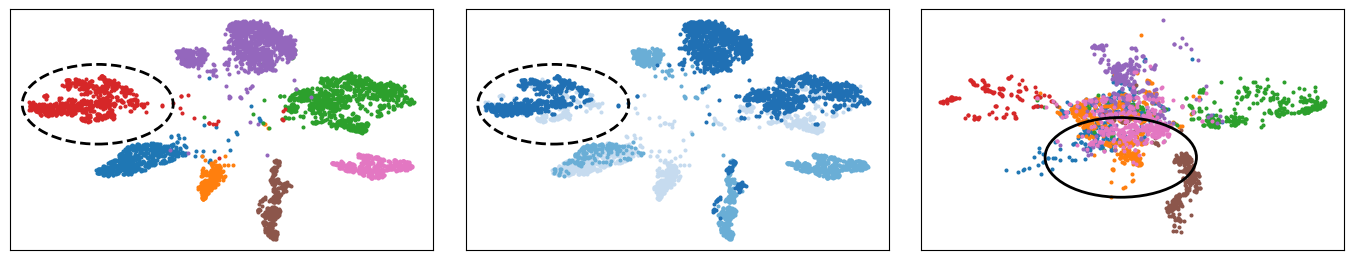

In [152]:
fig, axes = utils.plot_embeddings(pacs_nacc_arm)

# LEGEND
domain_legend = axes[1].get_legend_handles_labels()
class_legend = axes[0].get_legend_handles_labels()

circle = plt.Circle((-10, -30), 30, fill=False, linewidth=2)
axes[2].add_artist(circle)

circle = plt.Circle((-55, 10), 30, fill=False, linewidth=2, linestyle='--')
axes[0].add_artist(circle)
circle = plt.Circle((-55, 10), 30, fill=False, linewidth=2, linestyle='--')
axes[1].add_artist(circle)

for ax, name in zip(axes, ['source', 'domain', 'target']):
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])

    ax.tick_params(axis='both', which='both', bottom=False, top=False, 
                   left=False, right=False, labelbottom=False)
    # save each subplot
    extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(os.path.join(FILE_SAVE, f'tsne_pacs_arm_{name}.pdf'),
               bbox_inches=extent.expanded(1.1,1.1))
    
fig.savefig(os.path.join(FILE_SAVE, 'tsne_pacs_arm.pdf'), bbox_inches='tight', format='pdf')

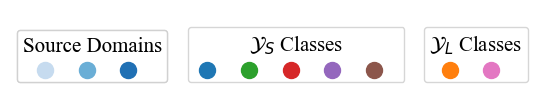

In [86]:
import matplotlib.pyplot as plt

fig_leg = plt.figure(figsize=(10, 8))
ax_leg = fig_leg.add_subplot(111)
ax_leg.axis('off')

# get non-overlapping class legends
noc_legend = ([],[])
oc_legend = ([],[])
for handle, label in zip(class_legend[0], class_legend[1]):
    if label in ['1', '6']:
        noc_legend[0].append(handle)
        noc_legend[1].append(label)
    else:
        oc_legend[0].append(handle)
        oc_legend[1].append(label)

# Create a Non-overlapping class legend
noc_l = ax_leg.legend(
    title="$\mathcal{Y}_L$ Classes",
    handles=noc_legend[0], 
    #labels=noc_legend[1], 
    labels=[None]*len(noc_legend[1]),
    markerscale=6,
    loc='lower right', 
    ncols=len(noc_legend[0]),
    #bbox_to_anchor=(0.55,0),
    columnspacing=0.2,
    title_fontsize=15,
    #bbox_to_anchor=(1,0.65),
    )


# Create a Overlapping class legend
oc_l = ax_leg.legend(
    title="$\mathcal{Y}_S$ Classes",
    handles=oc_legend[0], 
    #labels=oc_legend[1],
    labels=[None]*len(oc_legend[1]),
    markerscale=6,
    loc='lower center', 
    ncols=len(oc_legend[0]),
    bbox_to_anchor=(0.545,0),
    columnspacing=0.2,
    title_fontsize=15,
    #bbox_to_anchor=(1,0.5),
    )


# Create a domain legend
domain_l = ax_leg.legend(
    title="Source Domains",
    handles=domain_legend[0], 
    #labels=ax_legend[1][-3:], 
    labels=['','',''],
    loc='lower left', 
    ncols=len(domain_legend[0]), 
    markerscale=6,
    #bbox_to_anchor=(0,0),
    columnspacing=0.2,
    title_fontsize=15,
    #bbox_to_anchor=(1,0.35),
    )

ax_leg.add_artist(noc_l)
ax_leg.add_artist(oc_l)
ax_leg.add_artist(domain_l)

fig_leg.subplots_adjust(bottom=0.7, top=0.8, right=0.65)

fig_leg.savefig(os.path.join(FILE_SAVE, 'tsne_legend.pdf'), bbox_inches='tight', format='pdf')

In [20]:
pacs_macc_coral_folders = [
    "CORAL_PACS_o66_h5_s5001_t3_230304144600/b741b944114b3b167f5574131ecc3201",
    "CORAL_PACS_o66_h5_s5001_t3_230304144600/3b979b4430a0c70bceaa005eb26f8a64",
    "CORAL_PACS_o66_h5_s5001_t3_230304144600/69beb289ec4aa971f1dde281a90c7438",
    "CORAL_PACS_o66_h5_s5001_t3_230304144600/997fa13df696796c5b2381e1d059a99a",
    "CORAL_PACS_o66_h5_s5001_t3_230304144600/5c62820d16a9bfe5afaadfa531386aae",
    "CORAL_PACS_o66_h5_s5001_t3_230304144600/aabfa918f6456c026cc3c8c716715ba9",
    "CORAL_PACS_o66_h5_s5001_t3_230304144600/65d01e3e68508d9d518a6c561c5f0337",
    "CORAL_PACS_o66_h5_s5001_t3_230304144600/05db0170595b90a800f039d300076aad",
    "CORAL_PACS_o66_h5_s5001_t3_230304144600/8a80712f6f1b91283bd3fb336ca3d0db",
    "CORAL_PACS_o66_h5_s5001_t3_230304144600/53bf32ee233cc168f12bced821a7c445",
    "CORAL_PACS_o66_h5_s5001_t3_230304144600/02df3551183ded55cf5970aa2228459c",
    "CORAL_PACS_o66_h5_s5001_t3_230304144600/9407d9b8821dcf1cc8274d5d9baf9095",
]

In [21]:
vlcs_macc_mldg_folders = [
    "MLDG_VLCS_o66_h5_s5001_t3_230317220413/e93cb3334a22e660ebf8a86f9991edc7",
    "MLDG_VLCS_o66_h5_s5001_t3_230317220413/3b399af59ed34546a8d8e673ab154607",
    "MLDG_VLCS_o66_h5_s5001_t3_230317220413/9ac01f2a0c0a742322b293be42b57e60",
    "MLDG_VLCS_o66_h5_s5001_t3_230317220413/2a999745f2645f584a595dc2f2d19811",
    "MLDG_VLCS_o66_h5_s5001_t3_230317220413/45d27e0ebd4f19f183a93861c02ca0ea",
    "MLDG_VLCS_o66_h5_s5001_t3_230317220413/5c590a778a3a93ca7c15156e72befa08",
    "MLDG_VLCS_o66_h5_s5001_t3_230317220413/a110ebde1d12549a343ef85d5d6db894",
    "MLDG_VLCS_o66_h5_s5001_t3_230317220413/d1b76d2cef82b7233962cde6a79aadf7",
    "MLDG_VLCS_o66_h5_s5001_t3_230317220413/ceca3561b25ee7dcc801938159a39ed6",
    "MLDG_VLCS_o66_h5_s5001_t3_230317220413/123e589921a9a1a83e1f772c9c10dced",
    "MLDG_VLCS_o66_h5_s5001_t3_230317220413/46145a8e4243e9849c78a0f0624707bf",
    "MLDG_VLCS_o66_h5_s5001_t3_230317220413/df8d6a09929f7e35f6163182f7a3a133",
]

# OfficeHome 66% Dataset
(nacc, nacc) Baseline: SelfReg

(nacc, macc) Baseline: CORAL

In [22]:
oh_nacc_selfreg_folders = [
    "SelfReg_OfficeHome_o66_h5_s5001_t3_230314074602/a928f83e09e6612d9d3acbb33550adc3",
    "SelfReg_OfficeHome_o66_h5_s5001_t3_230314074602/d478174210cdaf49e349748f5ab59654",
    "SelfReg_OfficeHome_o66_h5_s5001_t3_230314074602/33915a72d0b7e5c6ec4150f46c2df936",
    "SelfReg_OfficeHome_o66_h5_s5001_t3_230314074602/54baa7eed4146abf237d271920242112",
    "SelfReg_OfficeHome_o66_h5_s5001_t3_230314074602/08cdd9c1dc7eea5b5b85de0af0c298cf",
    "SelfReg_OfficeHome_o66_h5_s5001_t3_230314074602/265c468c8636595af17367fc9ee1fafb",
    "SelfReg_OfficeHome_o66_h5_s5001_t3_230314074602/d7f53dbca2e3f9687956319de3d01a07",
    "SelfReg_OfficeHome_o66_h5_s5001_t3_230314074602/b74eb03d1b4d550f3df6da0d107f7a04",
    "SelfReg_OfficeHome_o66_h5_s5001_t3_230314074602/db0db860a04108e04be28f4a915e2fb4",
    "SelfReg_OfficeHome_o66_h5_s5001_t3_230314074602/c316567e9745598b9d37493d47c2ca41",
    "SelfReg_OfficeHome_o66_h5_s5001_t3_230314074602/67c0976b25b0cd507ffc030a2960ed7e",
    "SelfReg_OfficeHome_o66_h5_s5001_t3_230314074602/7aa13c915b9b2f8e56ff996e5a4ff351",
]

oh_macc_coral_folders = [
    "CORAL_OfficeHome_o66_h5_s5001_t3_230313124649/1f8e02ecb62bab61313bd8791afc43bb",
    "CORAL_OfficeHome_o66_h5_s5001_t3_230313124649/6f55bc3ef288fe92e17d47a4cb36b677",
    "CORAL_OfficeHome_o66_h5_s5001_t3_230313124649/2a1f4be5386a86e49340d266733d89bb",
    "CORAL_OfficeHome_o66_h5_s5001_t3_230313124649/9b8dec13d870f28fe499b829d1a7dfb6",
    "CORAL_OfficeHome_o66_h5_s5001_t3_230313124649/35b3205bbef9df380b5fd2035e5a11f5",
    "CORAL_OfficeHome_o66_h5_s5001_t3_230313124649/7d270a01c7662f113c8fa2e29f4806c7",
    "CORAL_OfficeHome_o66_h5_s5001_t3_230313124649/14b04ae2d5c592b55674bb8b82f34f92",
    "CORAL_OfficeHome_o66_h5_s5001_t3_230313124649/17dc0243a64208fc0da0147ead10b3b2",
    "CORAL_OfficeHome_o66_h5_s5001_t3_230313124649/a79f7be8de191ff01deb0a60da4e8efb",
    "CORAL_OfficeHome_o66_h5_s5001_t3_230313124649/51af7642156a07ce0b4392b356d401bf",
    "CORAL_OfficeHome_o66_h5_s5001_t3_230313124649/3a3689b8e5e67ee23dee0838fa33a276",
    "CORAL_OfficeHome_o66_h5_s5001_t3_230313124649/753317bb42dddeb0c1cdd72c65b4ba97",   
]

# XDomError Results
- For ERM: /Users/noname/scratch/saved/domainbed_results/66/ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/5b6c62f756e21a7af8c6863b3755d7e9/tsne_data.pickle test_env: 3 
- For This: /Users/noname/scratch/saved/domainbed_results/66/XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/54c54b901faa47fad7da7c8af58976f9/tsne_data.pickle test_env: 3
- Best performing model for PACS 66 for both algorithms
- (1) Focus on same class different domain clustering and (2) non-overlapping domain performance

In [23]:
folders = [  
'XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/50897f337eecb4dcd175fb8e997007d9',
'XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/41e92b26df0b1dc3894b52d27d01d970',
'XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/cb8267475230392cff913309cca60259',
'XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/94c2271242096367919f8b4d291672f6',
'XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/9620886701e89ef46150d3a581c99239',
'XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/5eaed5ac9234303b836ce8415d35616c',
'XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/841a8f3b78c38ed7b5f1de3b3493cb30',
'XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/0f8527d638246c520eab004565406714',
'XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/bd18dc8955faabbde9d97bde425d5b33',
'XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/3551c9f994c1f424747d5168d8311c47',
'XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/701a1c61015009d20034209bc03e40a8',
'XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/54c54b901faa47fad7da7c8af58976f9',
'XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/827f64403ffdfda52232bda06c48c922',
'XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/41e92b26df0b1dc3894b52d27d01d970',
'XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/58db656b82cf9862628a9b2e967551d7',
'XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/94c2271242096367919f8b4d291672f6',
'XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/9620886701e89ef46150d3a581c99239',
'XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/d13b8c53ba3f5130e31bcd17c3079690',
'XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/78f280b423731760cc65c48ed86bf45e',
'XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/1cec247d6d13402df03cf731baff1098',
'XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/6ba7ec9b4cd2cb5a22f17bca7159796d',
'XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/3551c9f994c1f424747d5168d8311c47',
'XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/44381f8b135e661544c0624058aea244',
'XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/8962630380fcd99c157a074c4aad7d86',
]
files = []
for folder in folders:
    path = f'/Users/noname/scratch/saved/domainbed_results/*/{folder}/*.pickle'
    path = sorted(glob(path, recursive=True))[0]
    assert os.path.exists(path), path
    files.append(path)
files

['/Users/noname/scratch/saved/domainbed_results/66/XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/50897f337eecb4dcd175fb8e997007d9/tsne_data.pickle',
 '/Users/noname/scratch/saved/domainbed_results/66/XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/41e92b26df0b1dc3894b52d27d01d970/tsne_data.pickle',
 '/Users/noname/scratch/saved/domainbed_results/66/XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/cb8267475230392cff913309cca60259/tsne_data.pickle',
 '/Users/noname/scratch/saved/domainbed_results/66/XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/94c2271242096367919f8b4d291672f6/tsne_data.pickle',
 '/Users/noname/scratch/saved/domainbed_results/66/XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/9620886701e89ef46150d3a581c99239/tsne_data.pickle',
 '/Users/noname/scratch/saved/domainbed_results/66/XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/5eaed5ac9234303b836ce8415d35616c/tsne_data.pickle',
 '/Users/noname/scratch/saved/domainbed_results/66/XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/84

In [24]:
df_list = []
for file in files:
    print('[processing]: ', file)
    df_list.append((get_tsne_df(file), file))
df_list[0][0]

[processing]:  /Users/noname/scratch/saved/domainbed_results/66/XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/50897f337eecb4dcd175fb8e997007d9/tsne_data.pickle


NameError: name 'get_tsne_df' is not defined

In [ ]:
for i, (df, file) in enumerate(df_list):
    print(file)
    # get test_env
    test_env = df[df['is_test'] == 1]['domain'].unique()
    print("test_env:", test_env[0])
    assert len(test_env) == 1
    test_env = test_env[0]
    
    if test_env != 1: continue

    fig, ax = plt.subplots(ncols=3, figsize=(13,4), sharex=True)
    # plot all target classes
    point_type = 'class'
    data = df.loc[(df['is_test']==1)].sort_values(by=point_type)
    ax[0] = plot_embeddings(data=data, ax=ax[0], point_type=point_type)

    # plot all source classes
    point_type = 'class'
    data = df.loc[(df['is_test']==0)].sort_values(by=point_type)
    ax[1] = plot_embeddings(data=data, ax=ax[1], point_type=point_type)

    # plot all source domains
    point_type = 'domain'
    data = df.loc[(df['is_test']==0)].sort_values(by=point_type)
    ax[2] = plot_embeddings(data=data, ax=ax[2], point_type=point_type)

    fig.tight_layout()
    fig.suptitle(f"{test_env}", fontsize=20)

# ERM Baseline

In [ ]:
folders = [
'ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/f86b3cc468dd62cc3baaac4834879428',
'ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/b00e7c2a9b675375ede2572b7c0db128',
'ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/28168eb78961558ccbc2ad6e47443084',
'ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/f5c19ac335e862a5ea8c772a6a9e347c',
'ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/871555760dcd62458679698b7df05833',
'ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/8858446df972524627c982b5b3a255ad',
'ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/d4d1e62236c8667d0fd27ee2126f6384',
'ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/bb446f4a54c16bcb674108582508932c',
'ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/6e49668d5b26e5cf4697b3a3005b1428',
'ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/852f0896d109b4404cf5785f18d50b3c',
'ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/e0e0f3dd065da05688c758b826692a18',
'ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/5b6c62f756e21a7af8c6863b3755d7e9',
'ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/146027d012c1e0b0322b2ae3fe672b74',
'ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/d276cb54cdb52181348333a0a92c27f6',
'ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/07359767d3beb0751d048ebef8742cea',
'ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/b4a403603cfae2b79c14a8a578e68c96',
'ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/b944c0f799ccbad794fb20674c7ed088',
'ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/8858446df972524627c982b5b3a255ad',
'ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/f37a062167e38bf3fc58fb1c98eee139',
'ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/8d1cf09570355de7fd1c84226b3b094c',
'ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/e0b01fd0d32e965050d616cd637b2965',
'ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/7bb3fbbd8178fb5978fd5f7d08367066',
'ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/e0e0f3dd065da05688c758b826692a18',
'ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/5b6c62f756e21a7af8c6863b3755d7e9',
]
files = []
for folder in folders:
    path = f'/Users/noname/scratch/saved/domainbed_results/*/{folder}/*.pickle'
    path = sorted(glob(path, recursive=True))[0]
    assert os.path.exists(path), path
    files.append(path)
files

In [ ]:
erm_df_list = []
for file in files:
    print('[processing]: ', file)
    erm_df_list.append((get_tsne_df(file), file))
erm_df_list[0][0]

In [ ]:
for i, (df, file) in enumerate(erm_df_list):
    print(file)
    # get test_env
    test_env = df[df['is_test'] == 1]['domain'].unique()
    print("test_env:", test_env[0])
    assert len(test_env) == 1
    test_env = test_env[0]
    
    if test_env != 1: continue

    fig, ax = plt.subplots(ncols=3, figsize=(13,4), sharex=True)
    # plot all target classes
    point_type = 'class'
    data = df.loc[(df['is_test']==1)].sort_values(by=point_type)
    ax[0] = plot_embeddings(data=data, ax=ax[0], point_type=point_type)

    # plot all source classes
    point_type = 'class'
    data = df.loc[(df['is_test']==0)].sort_values(by=point_type)
    ax[1] = plot_embeddings(data=data, ax=ax[1], point_type=point_type)

    # plot all source domains
    point_type = 'domain'
    data = df.loc[(df['is_test']==0)].sort_values(by=point_type)
    ax[2] = plot_embeddings(data=data, ax=ax[2], point_type=point_type)

    fig.tight_layout()
    fig.suptitle(f"{test_env},{i} ", fontsize=20)

# Camera Ready t-SNE Plots

In [ ]:
erm_file = '/Users/noname/scratch/saved/domainbed_results/66/ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/bb446f4a54c16bcb674108582508932c/tsne_data.pickle'
erm_df = utils.get_tsne_df(erm_file)
xdomerror_file = '/Users/noname/scratch/saved/domainbed_results/66/XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/841a8f3b78c38ed7b5f1de3b3493cb30/tsne_data.pickle'
xdomerror_df = utils.get_tsne_df(xdomerror_file)

In [ ]:
# camera ready
def camera_plot_embeddings(data, ax, point_type, colors, alpha=1, s=2, edgecolor=None):
    markers = ['o', 'v', 'p', '*', 'D', '>', 'P']
    for i, label in enumerate(data[point_type].unique()):
        ax.scatter(
            x=np.array(list(data[data[point_type]==label]['tsne_embeddings']))[:, 0].tolist(), 
            y=np.array(list(data[data[point_type]==label]['tsne_embeddings']))[:, 1].tolist(), 
            s=mpl.rcParams['lines.markersize'] ** s,
            color = colors[i], 
            label=label,
            marker='.',
            alpha=alpha,
            edgecolor=edgecolor
            )
    #ax.axis('off')
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    
    return ax

from IPython.core.debugger import set_trace
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(10,10), sharex=True, sharey=True)
df_list = [
    (xdomerror_df, "POXL"),
    (erm_df, "ERM")
]
domain_colors = cm.Blues(np.linspace(0,1, len(df_list[0][0]["domain"].unique())))
print(domain_colors)
class_colors = list(mcolors.TABLEAU_COLORS.keys())
for i, (df,title) in enumerate(df_list):
    # get test_env
    test_env = df[df['is_test'] == 1]['domain'].unique()
    print("test_env:", test_env[0])
    assert len(test_env) == 1
    test_env = test_env[0]
    
    # TARGET DOMAIN CLASSES
    point_type = 'class'
    data = df.loc[(df['is_test']==1)].sort_values(by=point_type)
    camera_plot_embeddings(data=data, ax=ax[i][0], point_type=point_type, s=2, colors=class_colors)    
#     ax[i][0].legend(
#         title="Classes", 
#         markerscale=8, 
#         loc='center left', 
#         bbox_to_anchor=(1.15,0.5),
#         frameon=False
#     )

    # SOURCE DOMAIN CLASSES
    point_type = 'class'
    data = df.loc[(df['is_test']==0)].sort_values(by=point_type)
    camera_plot_embeddings(data=data, ax=ax[i][1], point_type=point_type, s=3, colors=class_colors)

    # SOURCE DOMAINS
    point_type = 'domain'
    data = df.loc[(df['is_test']==0)].sort_values(by=point_type)
    camera_plot_embeddings(data=data, ax=ax[i][1], point_type=point_type, s=0.5, colors=domain_colors)
    ax_legend = ax[i][1].get_legend_handles_labels()

fig.tight_layout()

# get non-overlapping class legends
noc_legend = ([],[])
oc_legend = ([],[])
for handle, label in zip(ax_legend[0][:-3], ax_legend[1][:-3]):
    if label in ['1', '6']:
        noc_legend[0].append(handle)
        noc_legend[1].append(label)
    else:
        oc_legend[0].append(handle)
        oc_legend[1].append(label)
# Create a Non-overlapping class legend
noc_legend = fig.legend(
    title="$C_N$",
    handles=noc_legend[0], 
    #labels=noc_legend[1], 
    labels=[None]*len(noc_legend[1]),
    loc='center left', 
    #ncols=len(ax_legend[0][:-3])
    # bbox_to_anchor=(0.5,1.05),
    bbox_to_anchor=(1,0.65),
    )
# Add the legend manually to the current Axes.
ax = plt.gca().add_artist(noc_legend)
# Create a Overlapping class legend
oc_legend = fig.legend(
    title="$C_O$",
    handles=oc_legend[0], 
    #labels=oc_legend[1],
    labels=[None]*len(oc_legend[1]),
    loc='center left', 
    #ncols=len(ax_legend[0][:-3])
    # bbox_to_anchor=(0.5,1.05),
    bbox_to_anchor=(1,0.5),
    )
# Add the legend manually to the current Axes.
ax = plt.gca().add_artist(oc_legend)

# Create a domain legend
fig.legend(
    title="Source\nDomains",
    handles=ax_legend[0][-3:], 
    #labels=ax_legend[1][-3:], 
    labels=['','',''],
    loc='center left', 
    #ncols=len(ax_legend[0][-3:]), 
    markerscale=8,
    #bbox_to_anchor=(0.5,1.1),
    bbox_to_anchor=(1,0.35),
    )
#.legend()
#fig.suptitle(f"{title}", fontsize=20)

In [ ]:
# camera ready
def camera_plot_embeddings(data, ax, point_type, colors, alpha=1, s=2, edgecolor=None):
    markers = ['o', 'v', 'p', '*', 'D', '>', 'P']
    for i, label in enumerate(data[point_type].unique()):
        ax.scatter(
            x=np.array(list(data[data[point_type]==label]['tsne_embeddings']))[:, 0].tolist(), 
            y=np.array(list(data[data[point_type]==label]['tsne_embeddings']))[:, 1].tolist(), 
            s=mpl.rcParams['lines.markersize'] ** s,
            color = colors[i], 
            label=label,
            marker='.',
            alpha=alpha,
            edgecolor=edgecolor
            )
    #ax.axis('off')
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    
    return ax

from IPython.core.debugger import set_trace
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(16,4), sharex=True, sharey=True)
df_list = [
    (xdomerror_df, "POXL"),
    (erm_df, "ERM")
]
domain_colors = cm.Blues(np.linspace(0,1, len(df_list[0][0]["domain"].unique())))
print(domain_colors)
class_colors = list(mcolors.TABLEAU_COLORS.keys())
for i, (df,title) in enumerate(df_list):
    t_i = i*len(df_list)
    sd_i = i*len(df_list) + 1
    # get test_env
    test_env = df[df['is_test'] == 1]['domain'].unique()
    print("test_env:", test_env[0])
    assert len(test_env) == 1
    test_env = test_env[0]
    
    # TARGET DOMAIN CLASSES
    point_type = 'class'
    data = df.loc[(df['is_test']==1)].sort_values(by=point_type)
    camera_plot_embeddings(data=data, ax=ax[t_i], point_type=point_type, s=2.5, colors=class_colors)    
#     ax[i][0].legend(
#         title="Classes", 
#         markerscale=8, 
#         loc='center left', 
#         bbox_to_anchor=(1.15,0.5),
#         frameon=False
#     )

    # SOURCE DOMAIN CLASSES
    point_type = 'class'
    data = df.loc[(df['is_test']==0)].sort_values(by=point_type)
    camera_plot_embeddings(data=data, ax=ax[sd_i], point_type=point_type, s=3, colors=class_colors)

    # SOURCE DOMAINS
    point_type = 'domain'
    data = df.loc[(df['is_test']==0)].sort_values(by=point_type)
    camera_plot_embeddings(data=data, ax=ax[sd_i], point_type=point_type, s=1, colors=domain_colors)
    ax_legend = ax[i+len(df_list)].get_legend_handles_labels()

fig.tight_layout()

# get non-overlapping class legends
noc_legend = ([],[])
oc_legend = ([],[])
for handle, label in zip(ax_legend[0][:-3], ax_legend[1][:-3]):
    if label in ['1', '6']:
        noc_legend[0].append(handle)
        noc_legend[1].append(label)
    else:
        oc_legend[0].append(handle)
        oc_legend[1].append(label)
# Create a Non-overlapping class legend
noc_legend = fig.legend(
    title="Non-overlapping Classes",
    handles=noc_legend[0], 
    #labels=noc_legend[1], 
    labels=[None]*len(noc_legend[1]),
    markerscale=2,
    loc='upper left', 
    ncols=len(ax_legend[0][:-3]),
    bbox_to_anchor=(0.55,0),
    #bbox_to_anchor=(1,0.65),
    )
# Add the legend manually to the current Axes.
ax = plt.gca().add_artist(noc_legend)
# Create a Overlapping class legend
oc_legend = fig.legend(
    title="Overlapping Classes",
    handles=oc_legend[0], 
    #labels=oc_legend[1],
    labels=[None]*len(oc_legend[1]),
    markerscale=2,
    loc='upper left', 
    ncols=len(ax_legend[0][:-3]),
    bbox_to_anchor=(0.2,0),
    #bbox_to_anchor=(1,0.5),
    )
# Add the legend manually to the current Axes.
ax = plt.gca().add_artist(oc_legend)

# Create a domain legend
fig.legend(
    title="Source Domains",
    handles=ax_legend[0][-3:], 
    #labels=ax_legend[1][-3:], 
    labels=['','',''],
    loc='upper left', 
    ncols=len(ax_legend[0][-3:]), 
    markerscale=8,
    bbox_to_anchor=(0,0),
    #bbox_to_anchor=(1,0.35),
    )
#.legend()
#fig.suptitle(f"{title}", fontsize=20)